In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('/content/archive (3).zip')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [7]:
label_encoder = LabelEncoder()
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])

In [8]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
model = RandomForestClassifier(random_state=42)

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [14]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [16]:
print("Classification Report:")

print(report)

Classification Report:
              precision    recall  f1-score   support

     Absence       0.81      0.88      0.84        33
    Presence       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



In [18]:
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

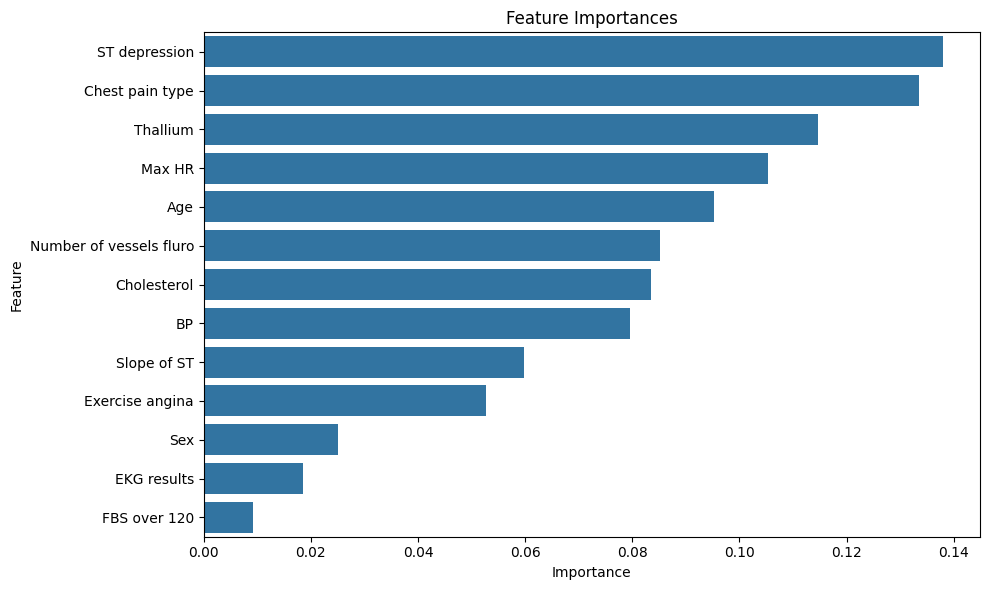

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [34]:
df = pd.read_csv('/content/archive (3).zip')

In [21]:
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

In [35]:
label_encoder = LabelEncoder()
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])

In [22]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
# Drop rows where the target is NaN
df = df.dropna(subset=['Heart Disease'])

# Proceed with feature/target split
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# (Continue with StandardScaler, train_test_split, etc.)


In [30]:
print(df['Heart Disease'].isna().sum())


0


In [31]:
print(df['Heart Disease'].isna().sum())


0


In [32]:
df = df.fillna(df.mean(numeric_only=True))

In [38]:
log_reg = LogisticRegression()


In [39]:
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
log_preds = log_reg.predict(X_test)

In [41]:
print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, log_preds))
print(classification_report(y_test, log_preds))

=== Logistic Regression Results ===
Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [44]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
xgb_preds = xgb.predict(X_test)

In [46]:
print("=== XGBoost Results ===")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

=== XGBoost Results ===
Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54



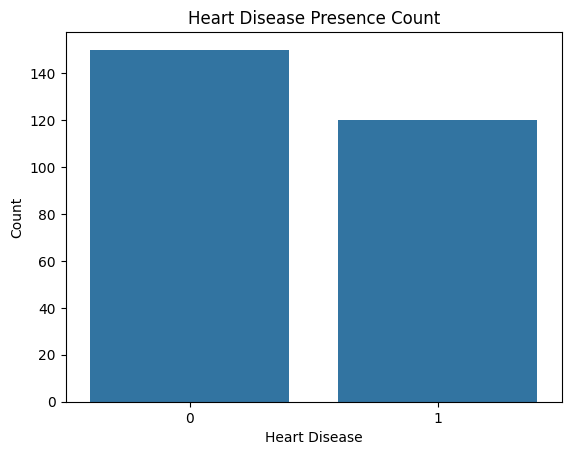

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Heart Disease')
plt.title('Heart Disease Presence Count')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


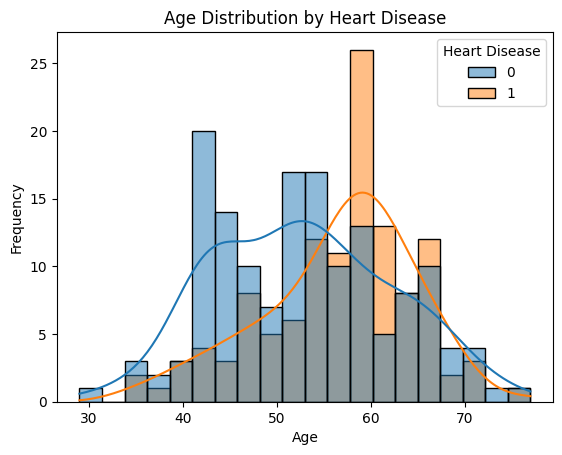

In [48]:
sns.histplot(data=df, x='Age', hue='Heart Disease', kde=True, bins=20)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


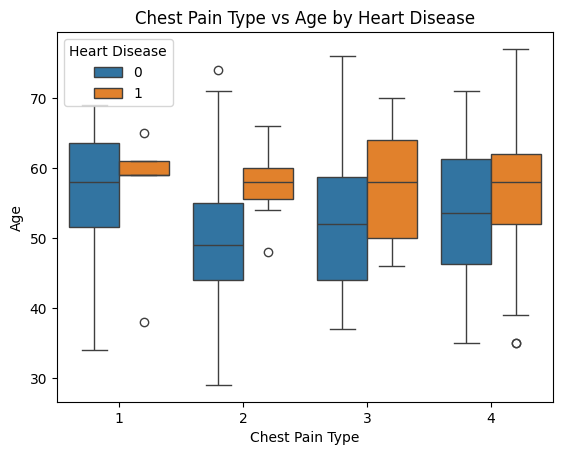

In [49]:
sns.boxplot(data=df, x='Chest pain type', y='Age', hue='Heart Disease')
plt.title('Chest Pain Type vs Age by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.show()


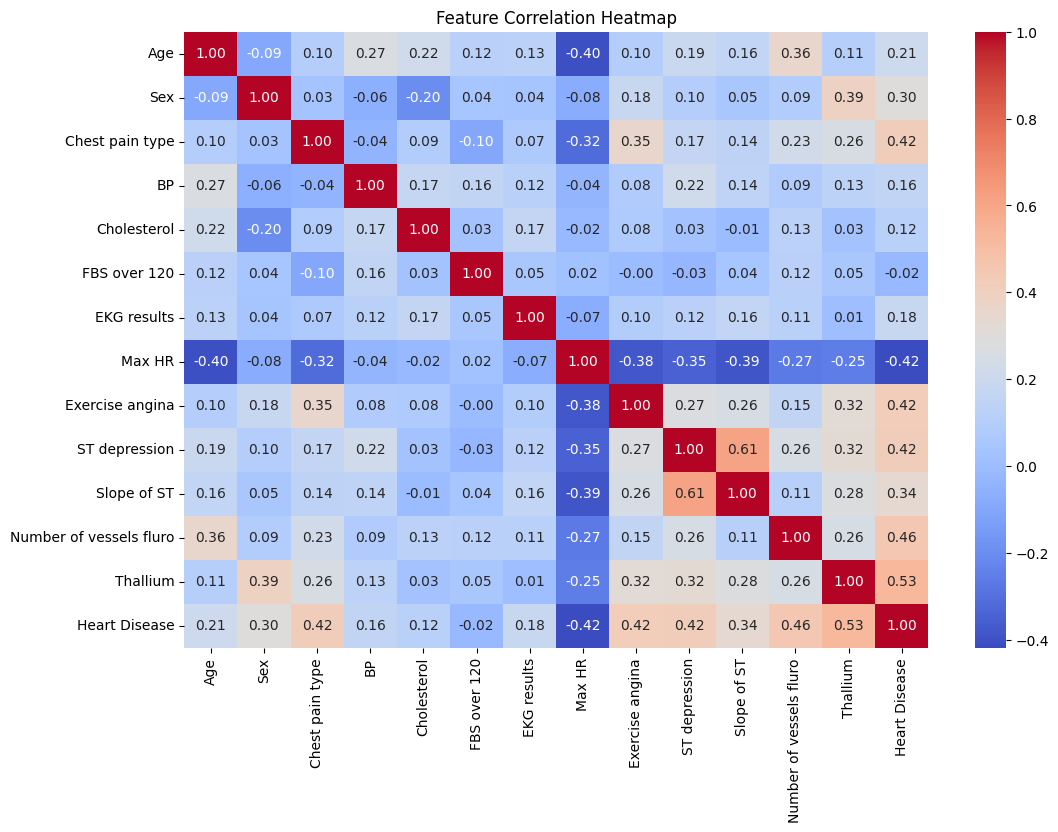

In [50]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()
